<a href="https://colab.research.google.com/github/NophaieViscente/PredictSalary/blob/main/PredictSalary_RegressionProblemExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Predição de Salário - Problema de Regressão
* Este projeto tem por objetivo, efetuar uma predição dos salários para determinados empregos, com base em um conjunto de dados pré-definido.
* O projeto será totalmente executado dentro deste Notebook.

# Carregando as bibliotecas necessárias.

* A seguir será efetuado o carregamento das bibliotecas necessárias para uso no projeto.

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Carregando os dados.

* A seguir é efetuado o carregamento dos dados para uso no projeto.

In [200]:
train = pd.read_csv(f'/content/drive/MyDrive/Train_rev1.csv')
test = pd.read_csv(f'/content/drive/MyDrive/Test_rev1.csv')
valid = pd.read_csv(f'/content/drive/MyDrive/Valid_rev1.csv')
location = pd.read_csv(f'/content/drive/MyDrive/Location_Tree.csv',header=None)

# AED (Análise Exploratória de Dados)
* Esta parte do projeto destina-se a análise exploratória de dados, parte importante de um projeto de DataScience. Através dessa primeira análise poderemos ter noções sobre o conjunto de dados que estamos trabalhando e também aplicar limpeza e transformação de dados.
 

### Validando as informações dos dataSets.

In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


* Observa-se que existem 244768 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.
* Um item faltante em Title.

### Encontrando o item faltante no Cargo.
* Encontrar o indice do item faltante para validar se pode ser adicionado manualmente o cargo.

In [202]:
for indice,conteudo in train.Title.items():
    if type(conteudo) != str :
      print(indice)

1588


In [203]:
train.loc[1588]

Id                                                             48271669
Title                                                               NaN
FullDescription       Quality Improvement Manager North West England...
LocationRaw                                       Liverpool, Merseyside
LocationNormalized                                            Liverpool
ContractType                                                  full_time
ContractTime                                                        NaN
Company                                                             NaN
Category                                      Healthcare & Nursing Jobs
SalaryRaw                                     40,000 to 45,000 per year
SalaryNormalized                                                  42500
SourceName                                               careworx.co.uk
Name: 1588, dtype: object

* Verificado o item de indice 1588, onde o cargo é o 'Quality Improvement Manager'

* Adicionar dados ao indice 1588 

In [204]:
train.loc[[1588],'Title'] = 'Quality Improvement Manager'

* Validar dados adicionados.

In [205]:
train.info(), train.loc[1588]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244768 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


(None, Id                                                             48271669
 Title                                       Quality Improvement Manager
 FullDescription       Quality Improvement Manager North West England...
 LocationRaw                                       Liverpool, Merseyside
 LocationNormalized                                            Liverpool
 ContractType                                                  full_time
 ContractTime                                                        NaN
 Company                                                             NaN
 Category                                      Healthcare & Nursing Jobs
 SalaryRaw                                     40,000 to 45,000 per year
 SalaryNormalized                                                  42500
 SourceName                                               careworx.co.uk
 Name: 1588, dtype: object)

* Verifica-se que fora adicionado o dado.

In [206]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122463 entries, 0 to 122462
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  122463 non-null  int64 
 1   Title               122463 non-null  object
 2   FullDescription     122463 non-null  object
 3   LocationRaw         122463 non-null  object
 4   LocationNormalized  122463 non-null  object
 5   ContractType        33013 non-null   object
 6   ContractTime        90702 non-null   object
 7   Company             106202 non-null  object
 8   Category            122463 non-null  object
 9   SourceName          122463 non-null  object
dtypes: int64(1), object(9)
memory usage: 9.3+ MB


* Observa-se que existem 122463 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.

In [207]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40663 entries, 0 to 40662
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  40663 non-null  int64 
 1   Title               40663 non-null  object
 2   FullDescription     40663 non-null  object
 3   LocationRaw         40663 non-null  object
 4   LocationNormalized  40663 non-null  object
 5   ContractType        10968 non-null  object
 6   ContractTime        30181 non-null  object
 7   Company             35312 non-null  object
 8   Category            40663 non-null  object
 9   SourceName          40663 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.1+ MB


* Observa-se que existem 40663 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.

### Verificando duplicidade de dados nos DataSets.

In [208]:
train.Id.unique().size, test.Id.unique().size, valid.Id.unique().size

(244768, 122463, 40663)

* Pode-se verificar que o Id é único em todos os datasets.

### Verificando os dados.
* Usando um histograma para validar a distribuição dos dados do Salário Normalizado

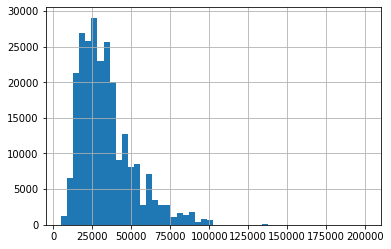

In [209]:
train.SalaryNormalized.hist(bins=50)

# Pré-Processamento de dados.
* Nessa fase iremos preparar os dados para a modelagem, com auxílio de algumas análises.

### Utilizando uma cópia do DataSet.
* Utilizando essa técnica para se caso ocorra um erro apenas recarreguemos o dataset inicial de treino, retornando desse ponto.

In [210]:
df_tmp = train.copy()

### Transformando os dados.
* Transformando os dados de cargos todos em caracteres minúsculos.

In [211]:
df_tmp.Title = df_tmp.Title.str.lower()

In [212]:
df_tmp.groupby('LocationRaw').count().sort_values(by='SalaryNormalized',ascending=True)

,Id,Title,FullDescription,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
LocationRaw,,,,,,,,,,,
"London, Middlesex, Hertfordshire, Buckinghamshire, Surrey, , Greater London",1,1,1,1,0,0,1,1,1,1,1
Nass,1,1,1,1,1,0,1,1,1,1,1
"National - Midlands, Home Counties, Thames Valley, South",1,1,1,1,0,1,1,1,1,1,1
National Role - Preferably Midlands/North West,1,1,1,1,1,1,1,1,1,1,1
National Role but Ideally based in the North of England,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
City of London - London,2344,2344,2344,2344,2344,2309,2344,2344,2344,2344,2344
City London South East,2843,2843,2843,2843,15,2667,2843,2843,2843,2843,2843
UK,5538,5538,5538,5538,2758,4685,5086,5538,5538,5538,5538


### Conferindo se a coluna 'SalaryRaw' tem algum valor nulo

In [213]:
df_tmp.SalaryRaw.isna().sum()

0

### Criação de novas características

* Criação de lista para alocar os valores únicos de salários

In [214]:
salary_list = df_tmp['SalaryRaw'].unique().tolist()

* Conferindo a quantidade de registros da lista

In [215]:
len(salary_list)

97286

* Criação de função para alocar em nova coluna a periodicidade de recebimento salarial

In [216]:
def base_salarial(x):
    y=""
    if "year" in str(x):
        y = "Yearly"
    elif "annum" in str(x):
        y = "Yearly"
    elif "hour" in str(x):
        y = "Hourly"
    elif "day" in str(x):
        y = "Daily"
    elif "week" in str(x):
        y = "Weekly"
    
    return y

In [217]:
df_tmp['Rate_by'] = df_tmp['SalaryRaw'].apply(base_salarial)

* Filtrando os dados que não tinham descrição deduzindo que são com periodicidade anual

In [218]:
filtro = df_tmp['Rate_by'] == ""

In [219]:
df_tmp.loc[filtro,'Rate_by'] = 'Yearly'

* Conferindo a quantidade de dados e frequência e periodicidade do cálculo de valor dos salários

In [220]:
df_tmp.groupby('Rate_by').SalaryRaw.count()

Rate_by
Daily       9195
Hourly     27879
Weekly      1498
Yearly    206196
Name: SalaryRaw, dtype: int64

* Criação de intervalos salariais/categorias

In [221]:
intervalosSalariais = [0,25000,50000,70000,90000,120000,300000]

In [222]:
df_tmp['SalaryBin'] = pd.cut(x=df_tmp.SalaryNormalized, bins=intervalosSalariais, labels=False)

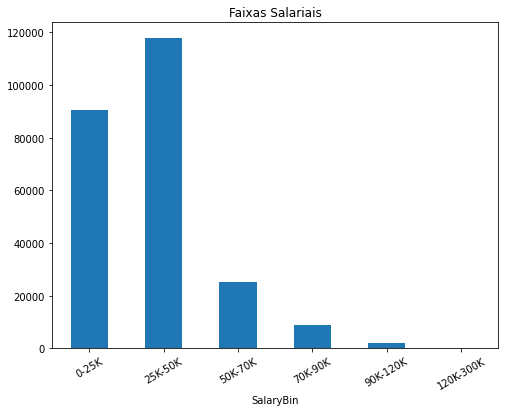

In [223]:
plt.figure(figsize=(8,6))
df_tmp.groupby('SalaryBin')['LocationNormalized'].count().plot.bar()
plt.title("Faixas Salariais")
plt.xticks([0,1,2,3,4,5],['0-25K','25K-50K','50K-70K','70K-90K','90K-120K','120K-300K'], rotation=30)
plt.show()

### Usando Vetorização de palavras para verificar a coluna Title - Cargo

In [225]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

y = df_tmp['SalaryBin'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(df_tmp['Title'], y, test_size=0.2)

cv = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df=0.03)

* Ajustando o count vectorizer para a coluna Title - Cargo

In [229]:
cv.fit(X_train)

title_words = pd.DataFrame(cv.transform(X_train).todense(), columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [230]:
title_words

,analyst,assistant,business,consultant,developer,engineer,executive,london,manager,sales,senior,support
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195809,0,0,0,0,0,0,0,0,1,0,0,0
195810,0,0,0,0,0,0,0,0,0,0,0,0
195811,0,0,0,0,0,0,0,0,0,0,0,0
195812,0,2,0,0,0,0,0,0,0,0,0,0


In [234]:
word_observe = pd.concat([title_words, y_train], axis=1)

word_observe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234992 entries, 0 to 244767
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   analyst     195814 non-null  float64 
 1   assistant   195814 non-null  float64 
 2   business    195814 non-null  float64 
 3   consultant  195814 non-null  float64 
 4   developer   195814 non-null  float64 
 5   engineer    195814 non-null  float64 
 6   executive   195814 non-null  float64 
 7   london      195814 non-null  float64 
 8   manager     195814 non-null  float64 
 9   sales       195814 non-null  float64 
 10  senior      195814 non-null  float64 
 11  support     195814 non-null  float64 
 12  SalaryBin   195814 non-null  category
dtypes: category(1), float64(12)
memory usage: 23.5 MB


In [250]:
for i in range(0,6) : 
  contadorPalavras = word_observe[word_observe['SalaryBin']==i].sum(axis=0)
  print(f'Faixa Salarial de {intervalosSalariais[i]}K até {intervalosSalariais[i+1]}K anual, ocorrências de palavras: ')
  palavrasComuns = contadorPalavras.sort_values(ascending=False)
  print(palavrasComuns)

Faixa Salarial de 0K até 25000K anual, ocorrências de palavras: 
manager       12226.0
engineer       5707.0
sales          4843.0
senior         4085.0
developer      3310.0
assistant      2983.0
executive      2600.0
business       2383.0
london         2360.0
analyst        2271.0
consultant     2270.0
support        2087.0
dtype: float64
Faixa Salarial de 25000K até 50000K anual, ocorrências de palavras: 
manager       15396.0
engineer       7402.0
sales          5949.0
senior         5154.0
developer      4367.0
assistant      3698.0
executive      3186.0
business       3019.0
analyst        2907.0
london         2868.0
consultant     2811.0
support        2599.0
dtype: float64
Faixa Salarial de 50000K até 70000K anual, ocorrências de palavras: 
manager       3264.0
engineer      1620.0
sales         1304.0
senior        1137.0
developer      836.0
assistant      786.0
executive      703.0
business       669.0
consultant     652.0
analyst        601.0
london         594.0
support 